In [1]:
!pip install keras

In [2]:
!pip install tensorflow 

In [3]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense   #Creating hidden layers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [4]:
Gas_turbines=pd.read_csv("gas_turbines.csv")
Gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
Gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
Gas_turbines.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [7]:
Gas_turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
Gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
Gas_turbines.shape

(15039, 11)

In [10]:
Gas_turbines.TEY.min()

100.17

In [11]:
Gas_turbines.TEY.max()

174.61

In [12]:
Gas_turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

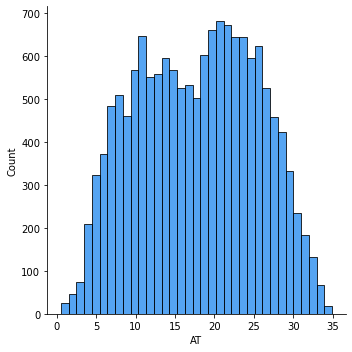

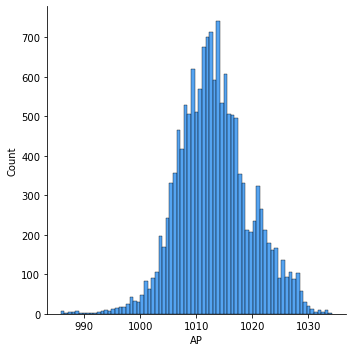

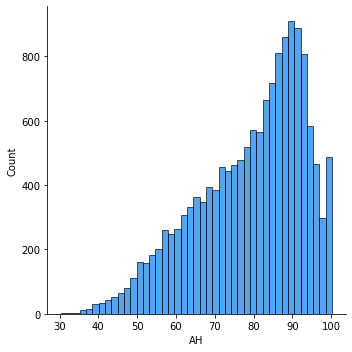

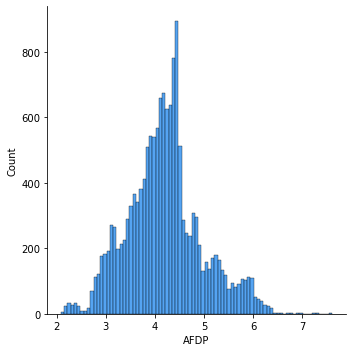

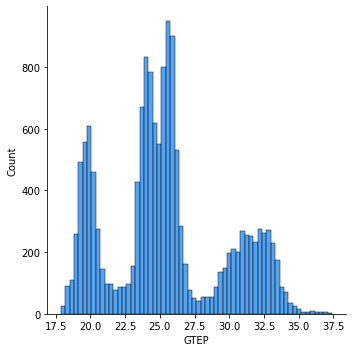

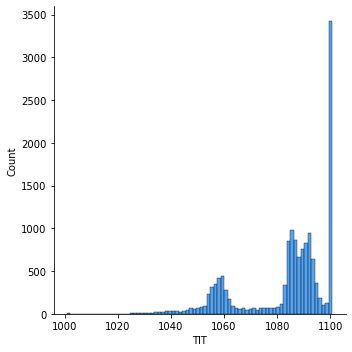

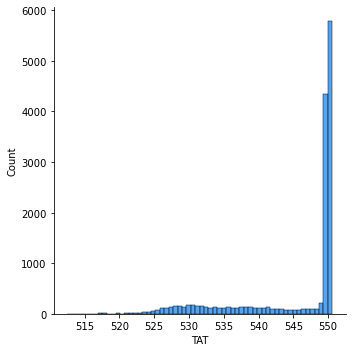

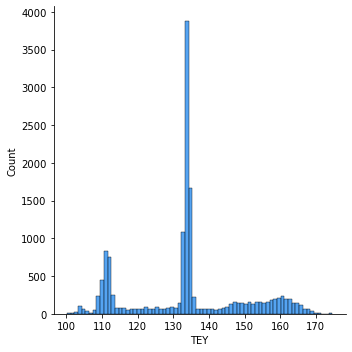

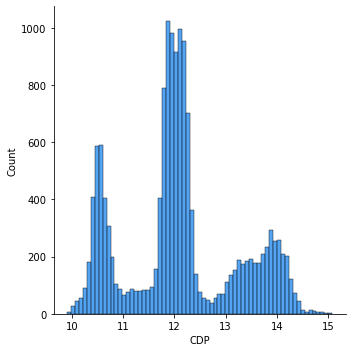

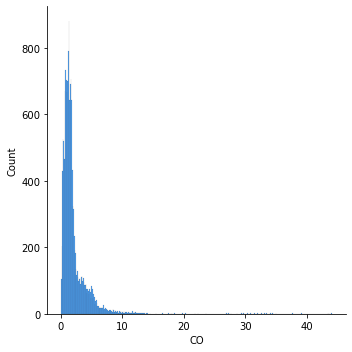

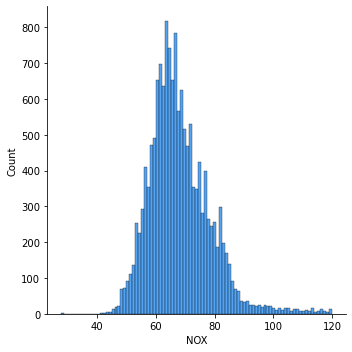

In [13]:
for i in Gas_turbines.columns:
    sns.displot(x=i,data=Gas_turbines,color='#1C86EE');

AT


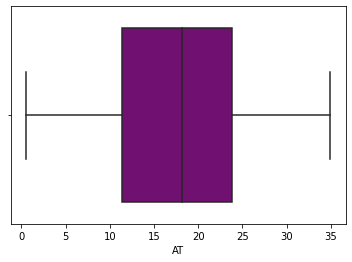

AP


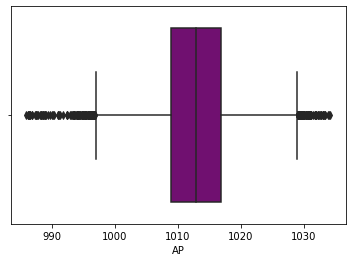

AH


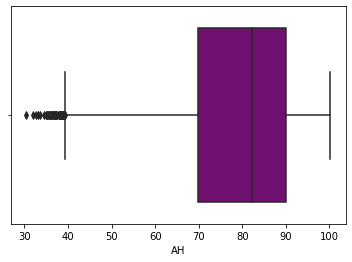

AFDP


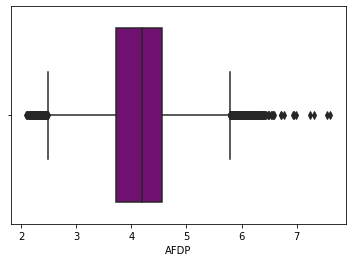

GTEP


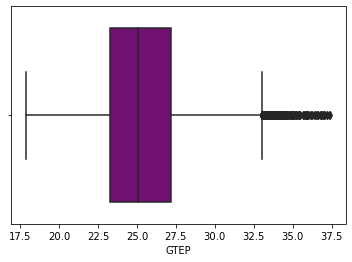

TIT


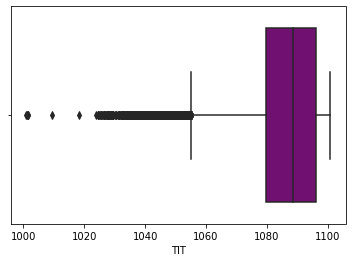

TAT


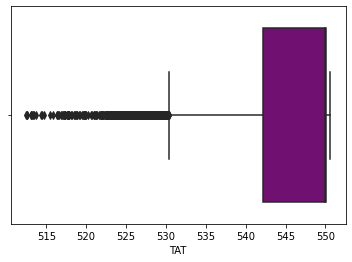

TEY


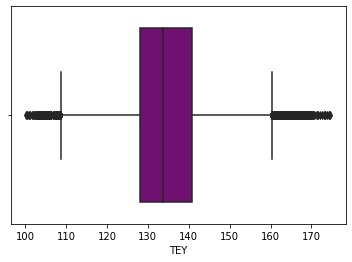

CDP


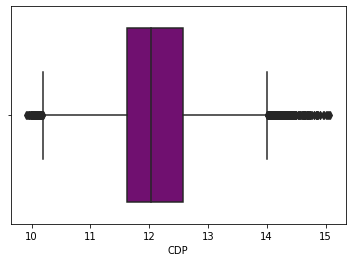

CO


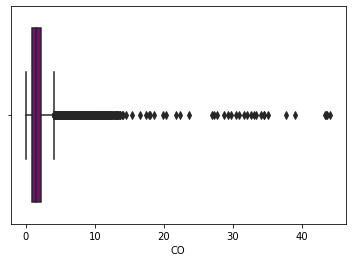

NOX


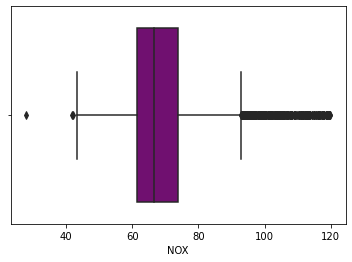

In [14]:
import warnings 
warnings.filterwarnings("ignore")
for i in Gas_turbines.columns:
    print(i)
    sns.boxplot(Gas_turbines[i],color="purple")
    plt.show()

<AxesSubplot:>

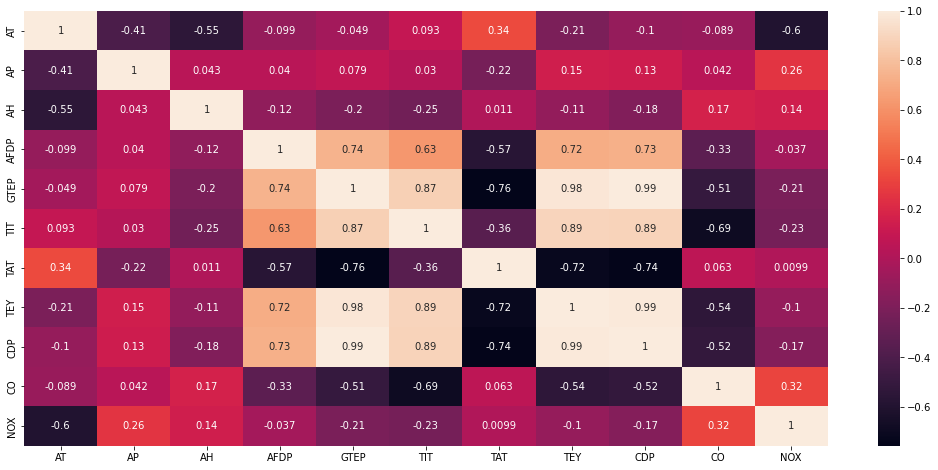

In [15]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(Gas_turbines.corr(),annot=True)

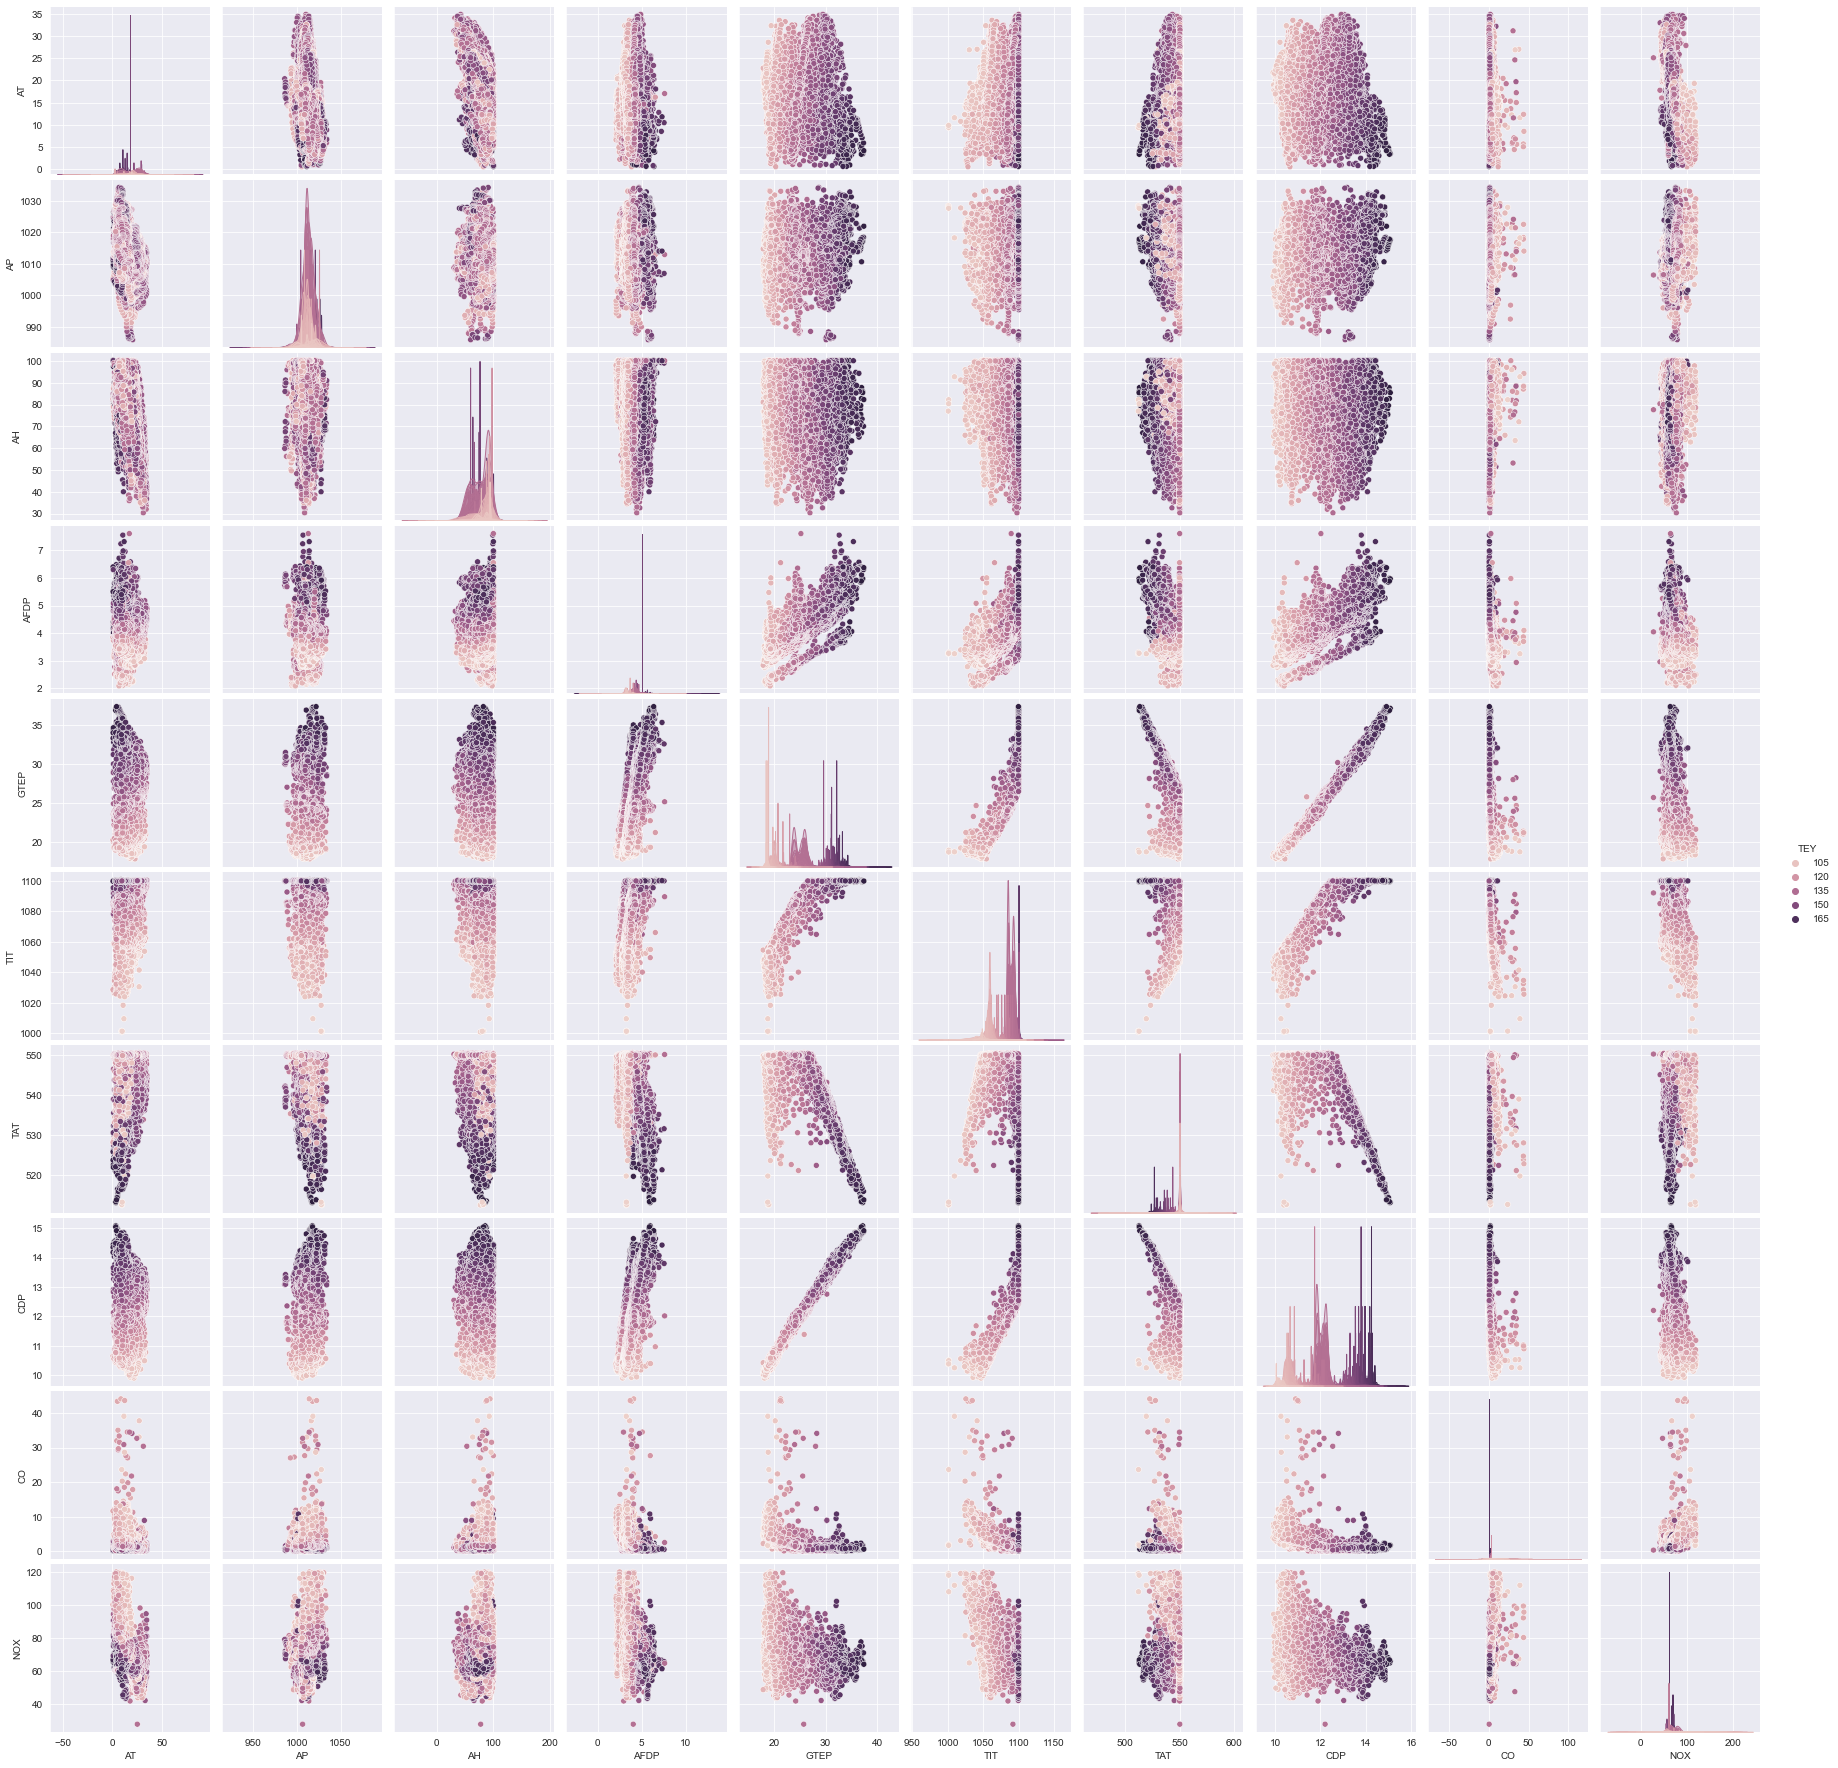

In [16]:
sns.set_style("darkgrid")
sns.pairplot(Gas_turbines,hue="TEY")
plt.show()

In [17]:
X=Gas_turbines.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO',
       'NOX']]
y=Gas_turbines.loc[:,["TEY"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model = Sequential()

model.add(Dense(4,input_dim=10,kernel_initializer='uniform',activation='relu'))

model.add(Dense(2, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
h=model.fit(X_train, y_train,epochs=25, batch_size=20)

Epoch 1/25
602/602 [==============================] - 1s 1ms/step - loss: 18192.5176 - mse: 18192.5176
Epoch 2/25
602/602 [==============================] - 1s 1ms/step - loss: 18031.9590 - mse: 18031.9590
Epoch 3/25
602/602 [==============================] - 1s 1ms/step - loss: 17872.4238 - mse: 17872.4238
Epoch 4/25
602/602 [==============================] - 1s 1ms/step - loss: 17713.7559 - mse: 17713.7559
Epoch 5/25
602/602 [==============================] - 1s 1ms/step - loss: 17555.9609 - mse: 17555.9609
Epoch 6/25
602/602 [==============================] - 1s 1ms/step - loss: 17398.9824 - mse: 17398.9824
Epoch 7/25
602/602 [==============================] - 1s 1ms/step - loss: 17242.7891 - mse: 17242.7891
Epoch 8/25
602/602 [==============================] - 1s 945us/step - loss: 17087.3320 - mse: 17087.3281
Epoch 9/25
602/602 [==============================] - 1s 1ms/step - loss: 16932.6777 - mse: 16932.6777
Epoch 10/25
602/602 [==============================] - 1s 1ms/step - lo

In [19]:
score = model.evaluate(X,y)
print(model.metrics_names[1],score[1])

470/470 [==============================] - 1s 1ms/step - loss: 14470.8291 - mse: 14470.8291
mse 14470.8291015625


In [20]:
pred=model.predict(X_test)
pred

94/94 [==============================] - 0s 1ms/step


array([[14.939681],
       [14.939681],
       [14.939681],
       ...,
       [14.939681],
       [14.939681],
       [14.939681]], dtype=float32)

In [21]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(pred,y_test)
mae

14414.794408563686

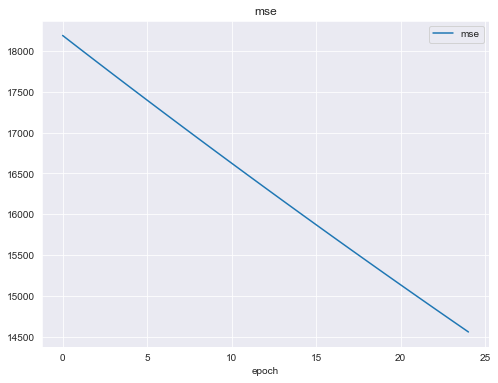

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['mse'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['mse']);

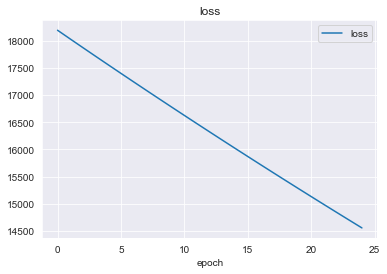

In [23]:

import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);